# UberDrive EDA

Problem:

The project is based on the trips made by Uber drivers. Here, we are analyzing different aspects of the trips by doing Exploratory Data Analysis.

Dataset: Kaggle 

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
uber = pd.read_csv('uberdrive.csv')


In [3]:
uber.head()              #head() gives us first 5 rows by default

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
uber.tail()             #tail() gives us last 5 rows by default

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


We can see last row contains totals row which is not necessary for the analysis 

Overview of the data

In [5]:
print(uber.shape)              #shape() gives us total number of rows and columns in the data

(1156, 7)


There are total 1156 rows and 7 columns in the data

In [6]:
uber.size                    #size gives us total number of elements in the data

8092

There are 8092 elements in the data

In [7]:
uber.info()                   #info() gives us the summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


We can see that:
    1.Except miles, all other datatypes are object.\
    2.There are very few missing values in the data

In [8]:
uber.isnull()           #isnull() returns boolean values of entire data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [9]:
uber.isnull().sum()           #sum() is used to find total missing values in the data

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

We can see there are 1 missing values in some columns and 503 missing values in purpose column

In [10]:
uber.describe()            #describe() gives us statistic summary of numerical column of the data i.e.Miles

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


As missing values are very few, we can drop them and store our data in new dataframe

In [11]:
df = uber.dropna()            #dropna() drops all the missing values present in uber and store the data in df

In [12]:
#To check whether missing values are drop

df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

We can see there are no missing values present in the df.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [14]:
#Let's check how many unique start locations we have in the dataset and we can find the total number using len()

unique_start_locations = df['START*'].unique()
unique_start_locations


array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Lake Wellingborough',
       'Fayetteville Street', 'Raleigh', 'Whitebridge', 'Hazelwood',
       'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill', 'Northwoods',
       'Edgehill Farms', 'Eastgate', 'East Elmhurst', 'Long Island City',
       'Katunayaka', 'Colombo', 'Nugegoda', 'Unknown Location',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Preston',
       'Heritage Pines', 'Tanglewood', 'Waverly Place', 'Wayne Ridge',
       'Westpark Place', 'East Austin', 'The Drag', 'South Congress',
       'Georgian Acres', 'North Austin', 'West University', 'Austin',
       'Katy', 'Sharpstown', 'Sugar Land', 'Galveston', 'Port Bolivar',
       'Washington Avenue',

In [15]:
total_unique_start_locations = len(unique_start_locations)
print("Total number of unique start locations:", total_unique_start_locations)

Total number of unique start locations: 131


In [16]:
#Let's check how many unique stop locations we have in the dataset and we can find the total number using len()


unique_stop_locations = df['STOP*'].unique()
total_unique_stop_locations = len(unique_stop_locations)
print("Total number of unique stop locations:", total_unique_stop_locations)


Total number of unique stop locations: 137


In [17]:
#We can analyze which is popular starting point for the uber drivers using value counts() whoch gives count of each unique start location with frequency

df['START*'].value_counts()

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Lower Manhattan       1
Lake Reams            1
Latta                 1
Briar Meadow          1
Gampaha               1
Name: START*, Length: 131, dtype: int64

In [18]:
#We can see Cary seems to be most popular, we can fetch it by using mode() which gives us element with highest frequency

print('The most popular starting location in uber drivers is : ', df['START*'].mode().loc[0])       #Here, we have used loc[] to access only the name of location

The most popular starting location in uber drivers is :  Cary


In [19]:
#Similarly, we can analyze which is popular starting point for the uber drivers using value counts() whoch gives count of each unique start location with frequency

df['STOP*'].value_counts()

Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
                   ... 
Cedar Hill            1
Florence              1
Ridgeland             1
Daytona Beach         1
Ilukwatta             1
Name: STOP*, Length: 137, dtype: int64

In [20]:
#Here, again we can see Cary seems to be most popular drop location

print('The most popular dropping location in uber drivers is : ', df['STOP*'].mode().loc[0])   

The most popular dropping location in uber drivers is :  Cary


In [21]:
#We can also analyze what is the most frequent route by uber drivers
#We can group start and stop points and use sort_values which will sort it in descending order

Most_frequent_route = pd.DataFrame(df.groupby('START*')['STOP*'].value_counts().sort_values(ascending=False).head(1))
print(Most_frequent_route)

                    STOP*
START* STOP*             
Cary   Morrisville     52


We can most frequent route by uber drivers is from cary to morrisville

In [22]:
#Let's view for what type of purpose was uber booked ?
print(np.array(df['PURPOSE*'].unique()))

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


In [23]:
#Let's view the rows that has different starting and dropping locations

#As Cary was the most popular starting and dropping location so, let's first analyze it for Cary
df_Cary_start = df.loc[df['START*']=='Cary']
df_Cary_start

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
28,1/15/2016 11:43,1/15/2016 12:03,Business,Cary,Durham,10.4,Meal/Entertain
30,1/18/2016 14:55,1/18/2016 15:06,Business,Cary,Cary,4.8,Meal/Entertain
34,1/20/2016 10:36,1/20/2016 11:11,Business,Cary,Raleigh,17.1,Meeting
...,...,...,...,...,...,...,...
1046,12-12-2016 17:51,12-12-2016 18:01,Business,Cary,Morrisville,3.0,Meal/Entertain
1048,12/13/2016 18:19,12/13/2016 18:29,Business,Cary,Cary,4.2,Errand/Supplies
1049,12/13/2016 20:20,12/13/2016 20:29,Business,Cary,Cary,4.1,Meal/Entertain
1052,12/14/2016 17:50,12/14/2016 18:00,Business,Cary,Morrisville,3.0,Meal/Entertain


In [24]:
#Displaying the rows for starting location as New York

df_NY_start =  df.loc[df['START*']=='New York']
df_NY_start


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
10,01-10-2016 15:08,01-10-2016 15:51,Business,New York,Queens,10.8,Meeting
22,01-12-2016 16:02,01-12-2016 17:00,Business,New York,Queens County,15.1,Meeting
106,2/14/2016 16:35,2/14/2016 17:02,Business,New York,Long Island City,13.0,Meeting
423,06-10-2016 15:19,06-10-2016 16:28,Business,New York,Jamaica,16.3,Meeting


Let's plot some graphs to visualize 

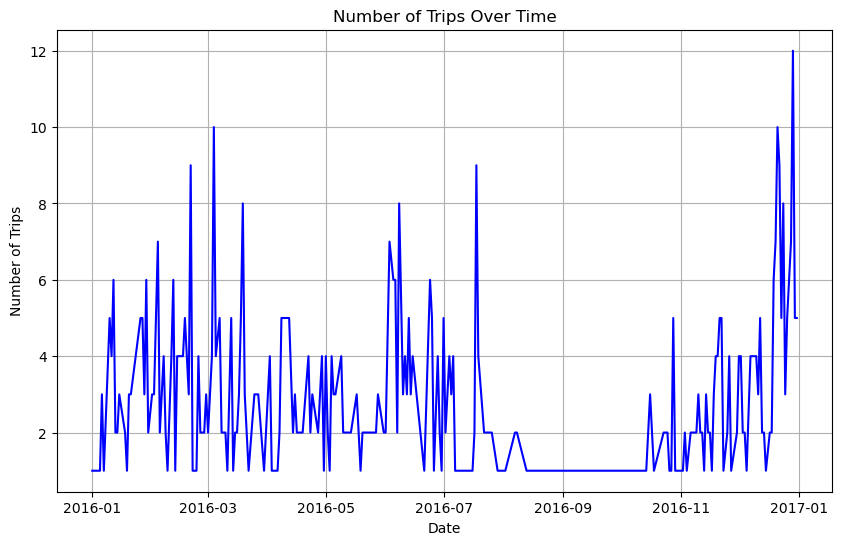

In [25]:
#Convert START_DATE* column to datetime format
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])

#Extract date from START_DATE* column
df['Date'] = df['START_DATE*'].dt.date

#Group by date and count the number of trips
trip_counts_by_date = df.groupby('Date').size()

#Plotting time series of trip counts
plt.figure(figsize=(10, 6))
trip_counts_by_date.plot(color='blue')
plt.title('Number of Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


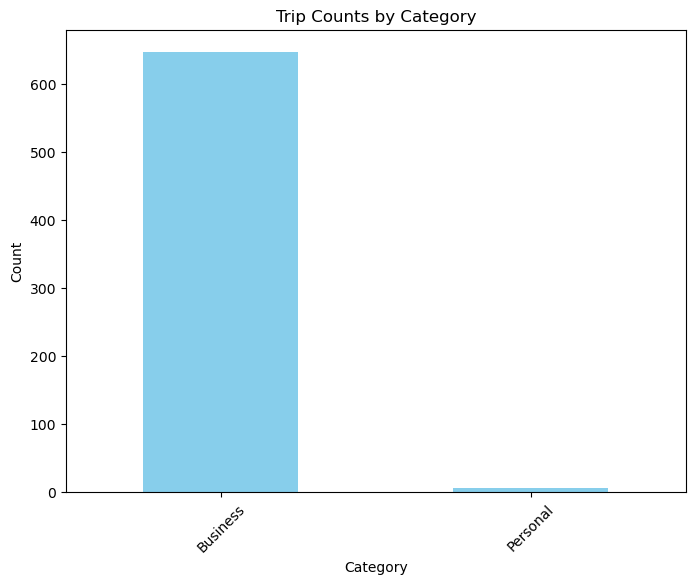

In [26]:
#Plotting bar chart of trip counts by category
plt.figure(figsize=(8, 6))
df['CATEGORY*'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Trip Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [27]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

We can observe the primary use case for Uber rides in this dataset is related to business activities.

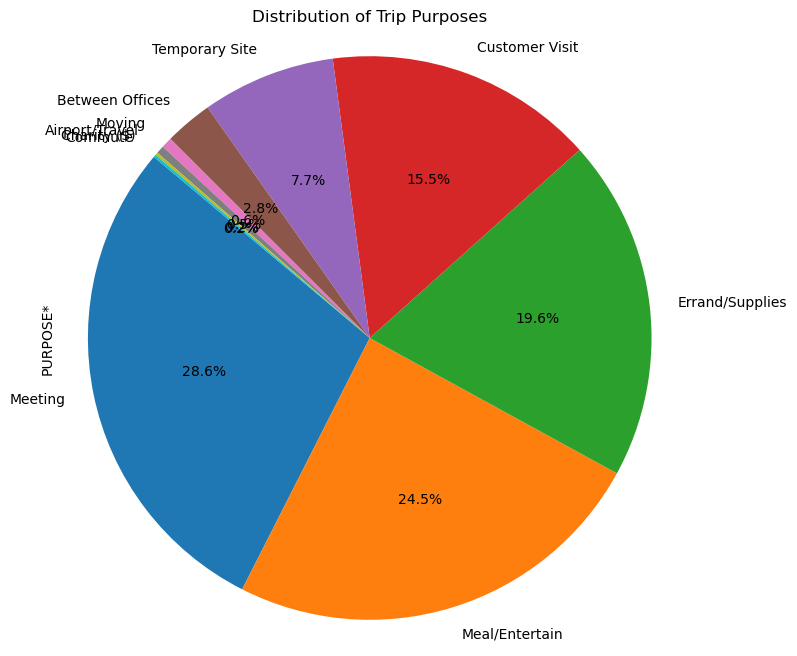

In [28]:
#Plotting pie chart of trip purposes
plt.figure(figsize=(8, 8))
df['PURPOSE*'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Trip Purposes')
plt.axis('equal')
plt.show()

The distribution of trip purposes highlights the diversity of activities conducted during business travel. Meetings and meals/entertainment appear to be common occurrences, suggesting that professionals often use Uber for transportation to and from these events. Additionally, the presence of errands/supplies trips indicates that Uber is also utilized for logistical purposes, such as purchasing supplies or running errands related to work.

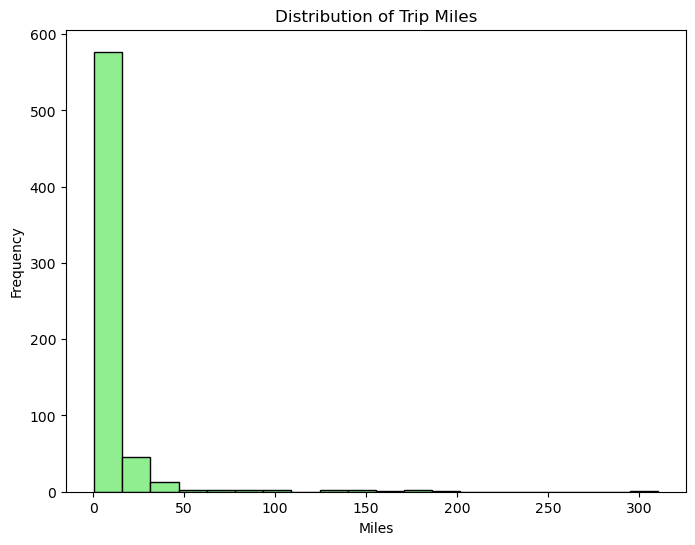

In [29]:
#Plotting histogram of trip miles
plt.figure(figsize=(8, 6))
plt.hist(df['MILES*'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Trip Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

Here are some insights drawn from this project:
    
    1.The fact that Cary is both the most popular start and drop point suggests that it might be a central location or a hub for Uber rides in the dataset. This could indicate that Cary is a densely populated area, a commercial center, or a location with high transportation demand.Also,Cary was tied as the second-best place to live on Livability's new 2024 list 
    of the Top 100 Best Places to Live in the U.S.
    
    2.The frequent route from Cary to Morrisville indicates a common travel pattern between these two locations. This insight could be useful for optimizing driver allocation, anticipating demand, or identifying potential reasons for the high volume of trips between these areas, such as commuting routes, business connections, or residential proximity.
    
    3.The distribution of trip purposes, with meetings being the most common followed by meal/entertain and errands/supplies, provides insights into the diverse reasons for Uber rides. The dominance of Business trips over Personal trips suggests that the dataset primarily consists of rides related to work or professional activities. This insight could be leveraged to tailor services, incentives, or partnerships targeting business travelers, such as corporate packages, expense management solutions.
    
    4.The observation that most trips have a mileage of 0-50 miles indicates that the majority of rides are relatively short-distance journeys. 
    




